In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as web
from scipy import stats
import seaborn as sns

C:\Users\USER\Anaconda3\envs\py3_TF2.0\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [2]:
total_shares = 3600
bbri_s = (2400/total_shares)
bbca_s = (100/total_shares)
#cash_s = (300/total_shares)
icbp_s = (700/total_shares)
sido_s = (300/total_shares)
ultj_s = (100/total_shares)

tickers = ['BBRI.JK', 'BBCA.JK', 'ICBP.JK', 'SIDO.JK', 'ULTJ.JK']
wts = [round(bbri_s,2), round(bbca_s,2), round(icbp_s,2), round(sido_s,2), round(ultj_s,2) ]

print(sum(wts))

1.0


In [3]:
price_data = web.get_data_yahoo(tickers,
                                start = '2015-01-01',
                                end = '2020-01-01')

price_data = price_data['Adj Close']


In [4]:
ret_data = price_data.pct_change()[1:]
ret_data.head()

Symbols,BBRI.JK,BBCA.JK,ICBP.JK,SIDO.JK,ULTJ.JK
Date,,,,,
2015-01-05,-0.004292,-0.001890,0.000000,0.000000,-0.004032
2015-01-06,-0.006465,-0.007576,-0.022813,-0.008197,0.025641
2015-01-07,0.021692,0.001908,0.011673,0.024793,0.006579
2015-01-08,0.016985,-0.011429,0.000000,-0.016129,0.091503
2015-01-09,0.004175,-0.003854,-0.003846,0.000000,-0.017964


### Calculate weighted return of our assets

In [6]:
weighted_returns = (wts * ret_data)
weighted_returns.head()

Symbols,BBRI.JK,BBCA.JK,ICBP.JK,SIDO.JK,ULTJ.JK
Date,,,,,
2015-01-05,-0.002876,-0.000057,0.000000,0.000000,-0.000121
2015-01-06,-0.004332,-0.000227,-0.004335,-0.000656,0.000769
2015-01-07,0.014534,0.000057,0.002218,0.001983,0.000197
2015-01-08,0.011380,-0.000343,0.000000,-0.001290,0.002745
2015-01-09,0.002797,-0.000116,-0.000731,0.000000,-0.000539


In [7]:
port_ret = weighted_returns.sum(axis=1)
# axis =1 tells pandas we want to add the rows

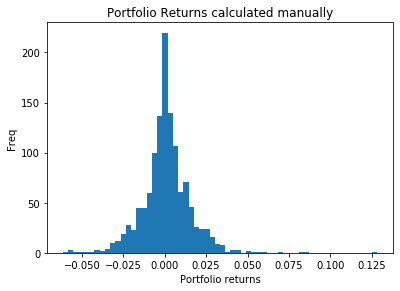

In [8]:
fig = plt.figure()
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
ax1.hist(port_ret, bins = 60)
ax1.set_xlabel('Portfolio returns')
ax1.set_ylabel("Freq")
ax1.set_title("Portfolio Returns calculated manually")
plt.show()

### Portofolio mean and Standard Deviation

In [9]:
mean_ret = port_ret.mean()
std_returns = port_ret.std()

In [10]:
mean_ret

0.0009826964985563292

In [11]:
std_returns

0.014942700350936502